## 1. Tutorial

### Biblioteka numpy

Numpy jest biblioteką do obliczeń numerycznych. Szczególnie dobrze nadaje się do operacji na macierzach
i wektorach.

Zwróć uwagę:

- numpy działa w oparciu nie o wbudowany typ <b>list</b>, ale o specjalny typ macierzowy <b>array</b>.
- <b>array</b> <a href="http://scipy-lectures.org/intro/numpy/array_object.html">umożliwia bardzo wygodne “krojenie” macierzy</a>

In [2]:
# !pip install numpy
# !pip install matplotlib
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

In [3]:
x = [1, 2, 3, 4, 5, 6 ]
v = np.array(x)
v

array([1, 2, 3, 4, 5, 6])

In [4]:
M = np.array([[1,2], [3,4]])
M

array([[1, 2],
       [3, 4]])

In [5]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

In [6]:
v.shape

(6,)

In [7]:
M.shape

(2, 2)

In [8]:
M.dtype

dtype('int32')

In [9]:
np.random.rand(5,3)

array([[0.67750848, 0.56329398, 0.0087721 ],
       [0.7254183 , 0.59903429, 0.53959165],
       [0.48214225, 0.19835749, 0.21945428],
       [0.59625509, 0.99704105, 0.21488218],
       [0.74304526, 0.98577593, 0.22834356]])

In [10]:
M = np.array([[1,2,3], [4,5,6]])
N = np.array([[1,1,1], [2,2,2]])
print(N)
print(M)

[[1 1 1]
 [2 2 2]]
[[1 2 3]
 [4 5 6]]


In [11]:
M+N

array([[2, 3, 4],
       [6, 7, 8]])

In [12]:
5*M

array([[ 5, 10, 15],
       [20, 25, 30]])

In [13]:
M*N

array([[ 1,  2,  3],
       [ 8, 10, 12]])

In [14]:
# Mnożenie macierzy
M.dot(N)

ValueError: shapes (2,3) and (2,3) not aligned: 3 (dim 1) != 2 (dim 0)

In [15]:
# Transpozycja
M.dot(N.T)

array([[ 6, 12],
       [15, 30]])

In [16]:
# Generowanie rownych odstepow
v=np.linspace(0,10,21)
v

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

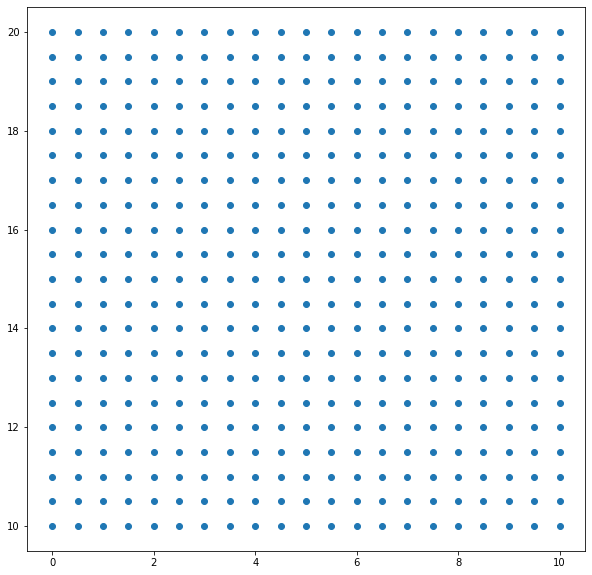

In [17]:
# Generowanie macierzy współrzędnych
x=np.linspace(0,10,21)
y=np.linspace(10,20,21)
xx, yy = np.meshgrid(x, y)
plt.scatter(xx,yy)

In [18]:
np.sin(v)

array([ 0.        ,  0.47942554,  0.84147098,  0.99749499,  0.90929743,
        0.59847214,  0.14112001, -0.35078323, -0.7568025 , -0.97753012,
       -0.95892427, -0.70554033, -0.2794155 ,  0.21511999,  0.6569866 ,
        0.93799998,  0.98935825,  0.79848711,  0.41211849, -0.07515112,
       -0.54402111])

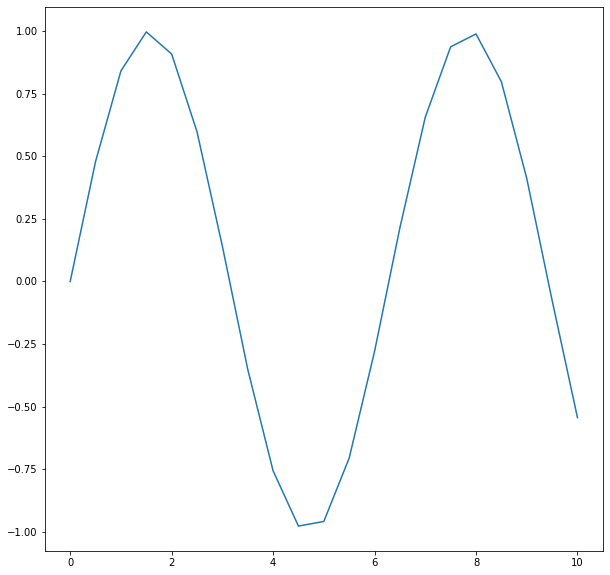

In [19]:
plt.plot(v, np.sin(v))
plt.show()

In [20]:
M = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12], [13,14,15,16]])
M

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [21]:
# Krojenie macierzy
# Wszystkie wiersze razy 2ga (trzecia) kolumna
M[:,2]

array([ 3,  7, 11, 15])

In [22]:
M[2,1:3]

array([10, 11])

In [23]:
M[1:3,2:4]

array([[ 7,  8],
       [11, 12]])

In [24]:
M[::2,:]

array([[ 1,  2,  3,  4],
       [ 9, 10, 11, 12]])

In [25]:
M

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [26]:
M[::2,::2]=0
M

array([[ 0,  2,  0,  4],
       [ 5,  6,  7,  8],
       [ 0, 10,  0, 12],
       [13, 14, 15, 16]])

### Kolory, obrazy

In [27]:
def gen_img(n=9, start=-1.5, end=1.5, size=2000):
    # Inicjalizacja danych
    x = np.linspace(start, end, size)
    y = np.linspace(start, end, size)
    xx, yy = np.meshgrid(x, y)
    Z = xx+yy*1j # Tworzymy macierz wartości zespolonych
    
    for i in range(50):
        #Z =  ((n-1)/n)*Z + (1/n)*(1/(Z**(n-1))) # alternatywny obraz
        Z = ((n**2-12/n**2)/n**2) * Z - 3/n**2 + (1/n**3)*(1/(Z**(n-1)))

    # Argument liczby zespolonej
    img = np.angle(Z)
    # Normalizacja do zakresu 0-255
    return 255*(img - np.min(img))/np.ptp(img)

In [33]:
# Można również przetestować funkcję dla innych n niż domyślne
img = gen_img()

In [34]:
# Funkcja zwraca dwuwymiarową tablicę wartości z zakresu 0-255
print(img)

[[ 16.68280748  16.68929429  16.69578587 ...  52.07846355  52.11589428
   52.15334503]
 [ 16.66792938  16.67441177  16.68089893 ...  52.06745447  52.10491744
   52.14240048]
 [ 16.65304652  16.65952448  16.66600721 ...  52.05642528  52.09392053
   52.13143591]
 ...
 [238.34695348 238.34047552 238.33399279 ... 202.94357472 202.90607947
  202.86856409]
 [238.33207062 238.32558823 238.31910107 ... 202.93254553 202.89508256
  202.85759952]
 [238.31719252 238.31070571 238.30421413 ... 202.92153645 202.88410572
  202.84665497]]


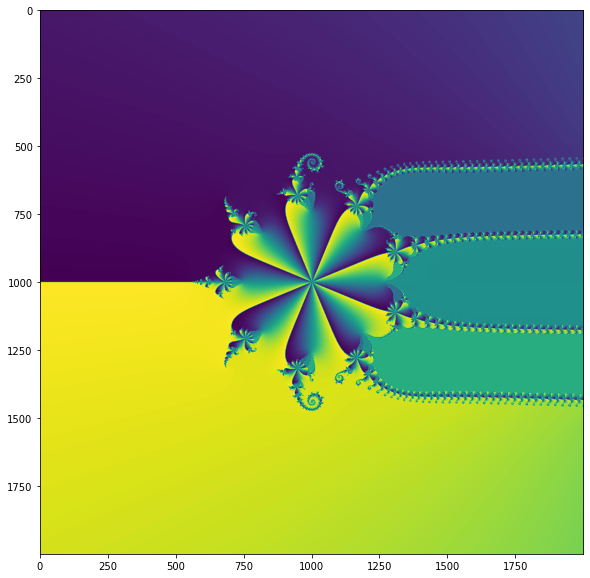

In [35]:
# Wyświetlanie numpy array jako obrazu
plt.imshow(img)

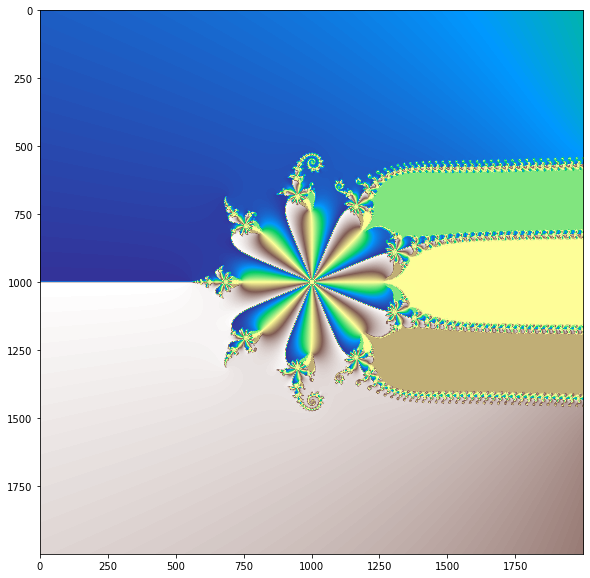

In [36]:
# Zmiana mapy kolorów
plt.imshow(img, cmap="terrain")

<a href="https://www.cs.put.poznan.pl/rsusmaga/Dydaktyka/TO--2017/TO-cz-1-wykladu-13-sent.pdf">Źródło</a> kodu generującego obraz wraz z objaśnieniem.

### Biblioteka skimage

In [39]:
# !pip install scikit-image
from skimage import io
from skimage import color

# Wczytywanie obrazu
img = io.imread('pic.jpg')

In [40]:
# Obraz RGB
print(img[50:54,50:54])

[[[140 161 162]
  [138 159 160]
  [150 171 172]
  [161 182 183]]

 [[190 211 212]
  [209 230 231]
  [214 235 236]
  [175 196 197]]

 [[193 217 217]
  [138 162 162]
  [147 171 171]
  [153 177 177]]

 [[118 142 142]
  [ 87 111 111]
  [147 171 171]
  [124 148 148]]]


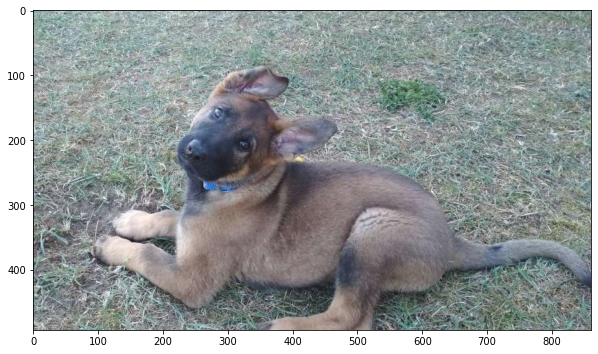

In [41]:
plt.imshow(img)

In [42]:
# Wczytywanie z konwersją RGB -> skala szarości
img_bw = io.imread('pic.jpg', as_gray=True)

In [43]:
print(img_bw[50:54,50:54])

[[0.61415529 0.60631216 0.65337098 0.69650824]
 [0.81023373 0.88474353 0.90435137 0.7514102 ]
 [0.83098039 0.61529412 0.65058824 0.67411765]
 [0.53686275 0.41529412 0.65058824 0.56039216]]


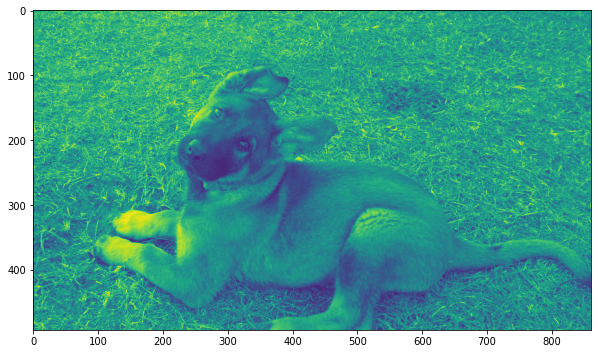

In [92]:
plt.imshow(img_bw)

In [47]:
# Konwersja z RGB na skalę szarości
img_bw2 = color.rgb2gray(img)

### Dźwięk

In [58]:
# !pip install playsound
# !pip install scipy
from playsound import playsound
from scipy.io import wavfile

In [60]:
# Odtwarzanie dźwięku
playsound('err.wav')

In [61]:
# Wczytywanie pliku wav
# samplerate to częstotliwość próbkowania, data to próbki
samplerate, data = wavfile.read('err.wav')

In [62]:
# Zapisanie pliku wav
wavfile.write("test.wav", samplerate, data)

In [63]:
# Sprawdzenie liczby próbek i liczby kanałów
np.shape(data)

(42880, 2)

## 2. Zadania

### Biblioteka numpy

1. Utwórz macierz 2D:

[ 1, 3, 1, 2]<br>
[ 1, 2, 5, 8]<br>
[ 3, 1, 2, 9]<br>
[ 5, 4, 2, 1]<br>

In [64]:
M = np.array([[1,3, 1, 2], [1, 2, 5, 8], [3, 1, 2, 9], [ 5, 4, 2, 1]])
M

array([[1, 3, 1, 2],
       [1, 2, 5, 8],
       [3, 1, 2, 9],
       [5, 4, 2, 1]])

2. Wytnij z utworzonej macierzy pierwszy i ostatni wiersz oraz ostatnią kolumnę.

In [65]:
M[1:3]

array([[1, 2, 5, 8],
       [3, 1, 2, 9]])

3. Utwórz macierz 2D:

[ 2, 3, 1]<br>
[ 5, 1, 3]<br>

In [66]:
M = np.array([[2, 3, 1],[5, 1, 3]])
M

array([[2, 3, 1],
       [5, 1, 3]])

4. Dokonaj transpozycji powyższej macierzy.

In [67]:
M = np.transpose(M)
M

array([[2, 5],
       [3, 1],
       [1, 3]])

5. Oblicz iloczyn macierzy z punktu 2 i 4.

In [68]:
M = M.dot(M[1:3])
M

array([[11, 17],
       [10,  6],
       [ 6, 10]])

6. Stwórz wykres funkcji sin w przedziale od −π do π z liczbą punktów równą: 3, 10, 100.

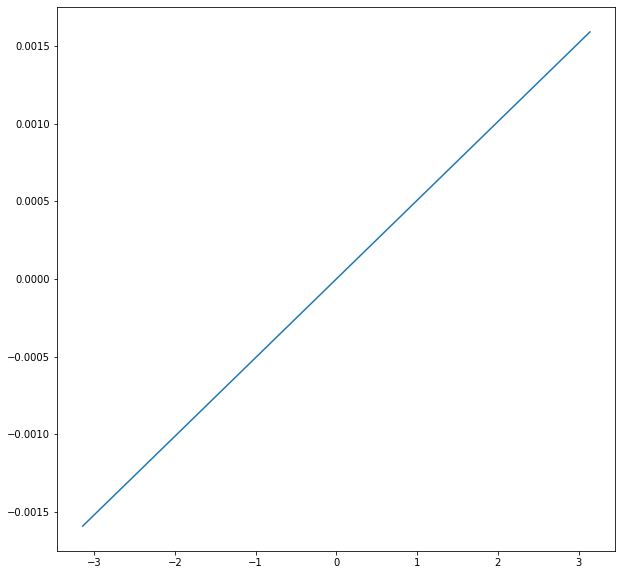

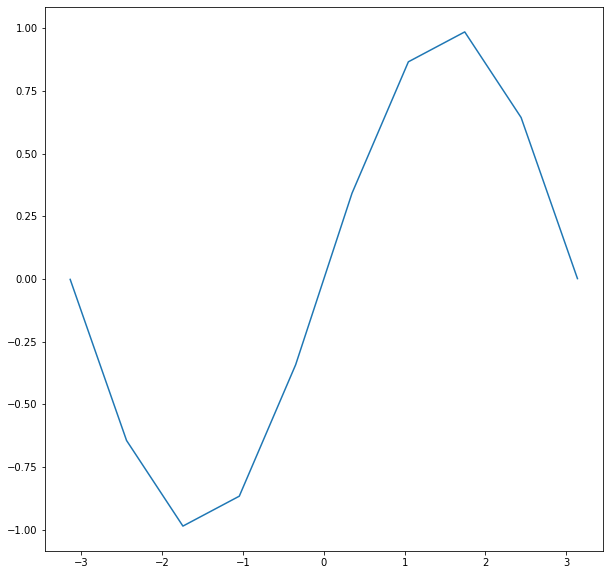

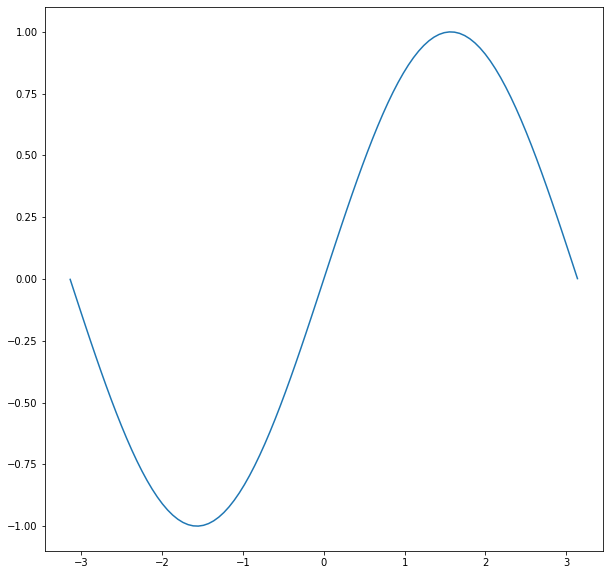

In [69]:
v1 = np.linspace(-3.14, 3.14, 3)
v2 = np.linspace(-3.14, 3.14, 10)
v3 = np.linspace(-3.14, 3.14, 100)
plt.plot(v1, np.sin(v1))
plt.show()
plt.plot(v2, np.sin(v2))
plt.show()
plt.plot(v3, np.sin(v3))
plt.show()

### Obrazy

1. Przetestuj różne mapy kolorów korzystając z obrazu wygenerowanego przy użyciu funkcji gen_img()

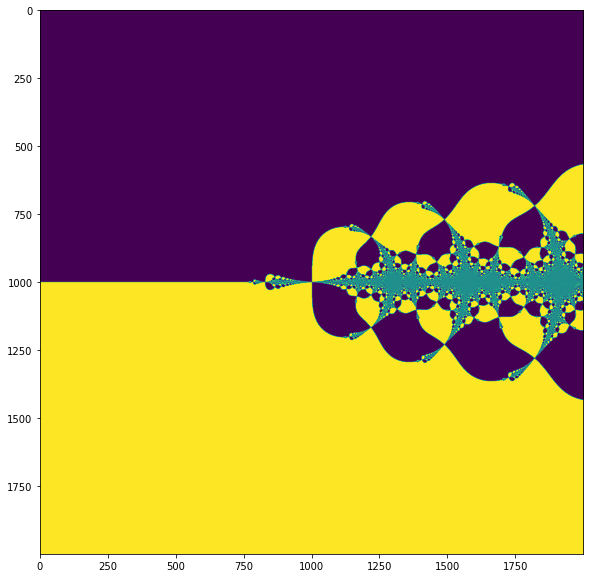

In [70]:
img = gen_img(n=3)
plt.imshow(img)

2. Wczytaj obraz z pliku "pic.jpg" i sprawdź wymiary tablicy

In [71]:
img2 = io.imread('pic.jpg')
img2.shape

(493, 861, 3)

3. Przekonwertuj obraz do skali szarości i sprawdź wymiary tablicy

In [72]:
img_bw = io.imread('pic.jpg', as_gray=True)
img_bw.shape

(493, 861)

4. Wyświetl obraz w skali szarości (poszukaj odpowiedniej mapy kolorów)

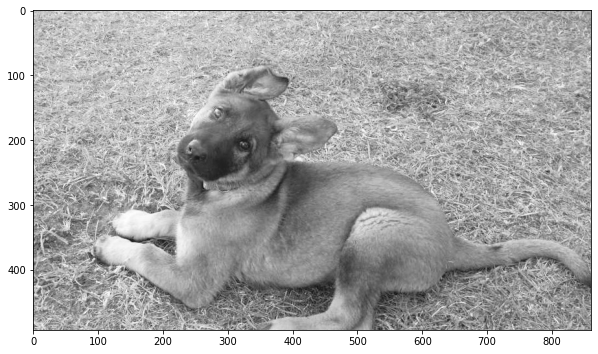

In [122]:
img_bw = io.imread('pic.jpg', as_gray=True)
plt.imshow(img_bw, cmap='Greys_r')

5. Wykadruj obraz tak aby na obrazie pozostała tylko głowa

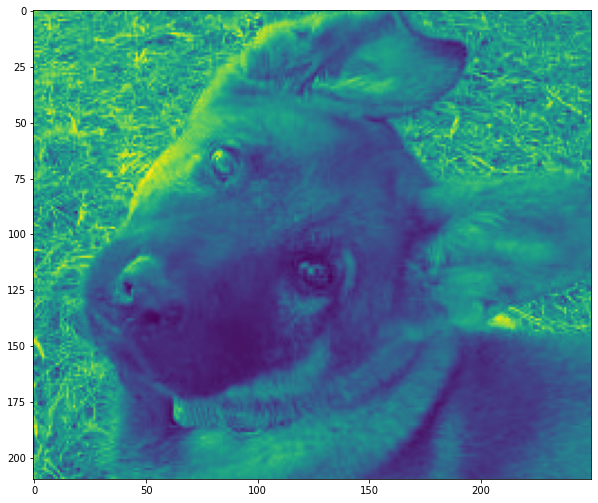

In [123]:
plt.imshow(img_bw[90:300, 200:450])

6. Dokonaj inwersji kolorów (stwórz "negatyw" obrazu)

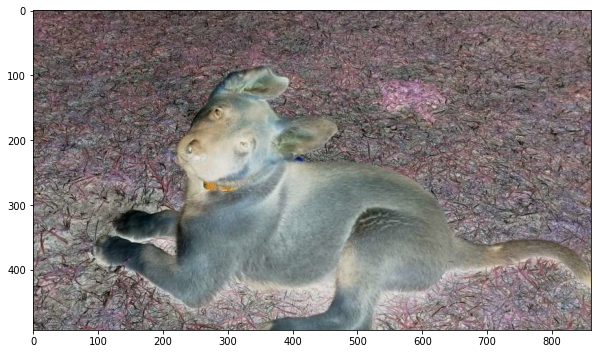

In [109]:
img_bw = io.imread('pic.jpg')
y = np.shape(img_bw)
negative = np.zeros(y)
negative = 255-img_bw
plt.imshow(negative)

7. Korzystając z numpy wygeneruj poniższy obraz

![title](gradient.png)

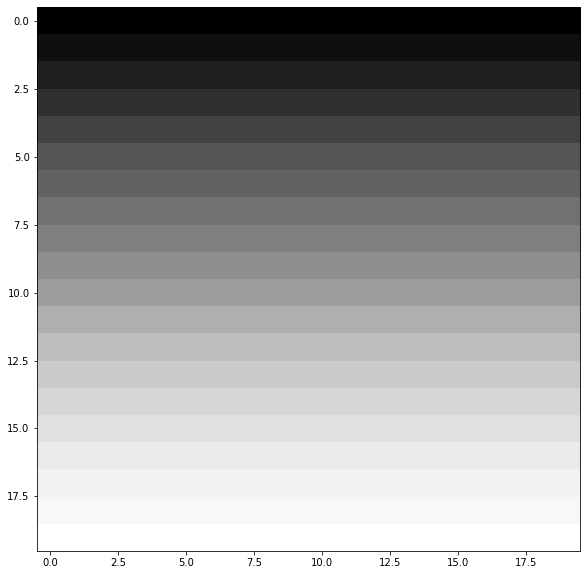

In [146]:
data = np.array([[x for _ in range(0, 20)] for x in range(20)])
plt.imshow(data, cmap='Greys_r')

8. Korzystając z numpy wygeneruj poniższy obraz

![title](goal.png)

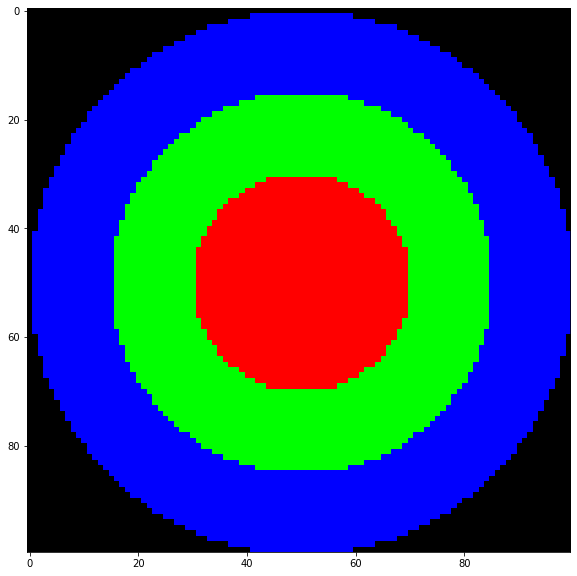

In [170]:
from skimage import draw
arr = np.zeros((100, 100, 3))
rr, cc = draw.circle(50, 50, radius=50, shape=arr.shape)
arr[rr, cc, 2] = 1
rr, cc = draw.circle(50, 50, radius=35, shape=arr.shape)
arr[rr, cc, 2] = 0
arr[rr, cc, 1] = 1
rr, cc = draw.circle(50, 50, radius=20, shape=arr.shape)
arr[rr, cc, 2] = 0
arr[rr, cc, 1] = 0
arr[rr, cc, 0] = 1
plt.imshow(arr)

### Dźwięki

1. Wczytaj pllik "err.wav"

In [176]:
samplerate, data = wavfile.read('err.wav')
wavfile.write("test.wav", samplerate, data)

2. Wyświetl wymiary tablicy przechowującej plik

In [177]:
data.shape

(42880, 2)

3. Stwórz wykres przebiegu sygnału w czasie

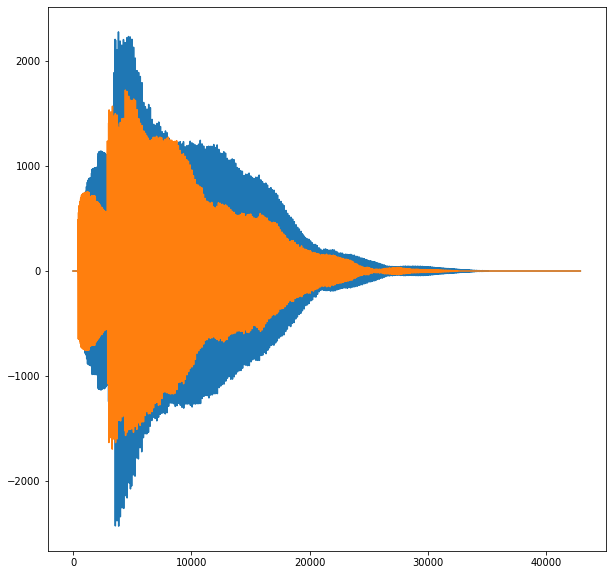

In [187]:
plt.plot(data)

4. Wczytaj plik "leto.wav"

In [287]:
samplerate, data = wavfile.read('leto.wav')

5. Zastosuj efekt fade in (stopniowe zgłaśnianie) przemnażając próbki przez odpowiednie wagi i zapisując efekt do pliku .wav. Pamiętaj że nagranie ma dwie ścieżki.

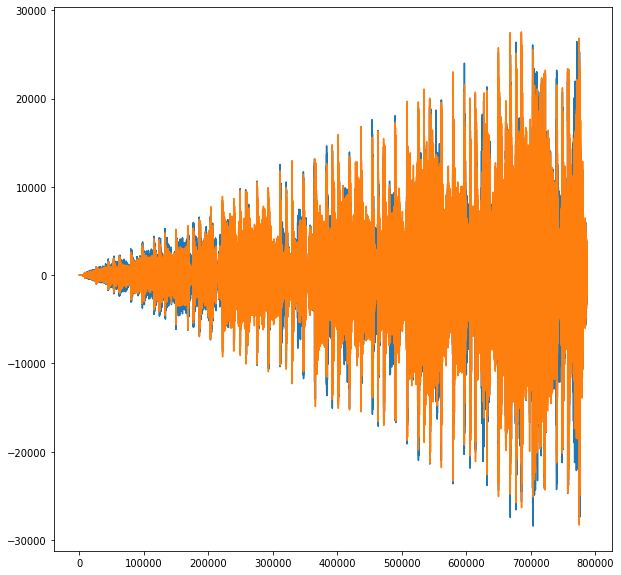

In [317]:
samplerate1, data1 = wavfile.read('leto.wav')
signal1 = data1[0:, 0]
signal2 = data1[0:, 1]

kernel = np.linspace(0,1,len(data1))

data1[0:, 0] = signal1 * kernel
data1[0:, 1] = signal2 * kernel
plt.plot(data1)
wavfile.write("test3.wav", samplerate, data1)

6. Powtórz poprzednie polecenie, tym razem stosując fade-in logarytmiczny. Jaka jest różnica w porównaniu do poprzedniego podejścia? Dlaczego tak się dzieje? 

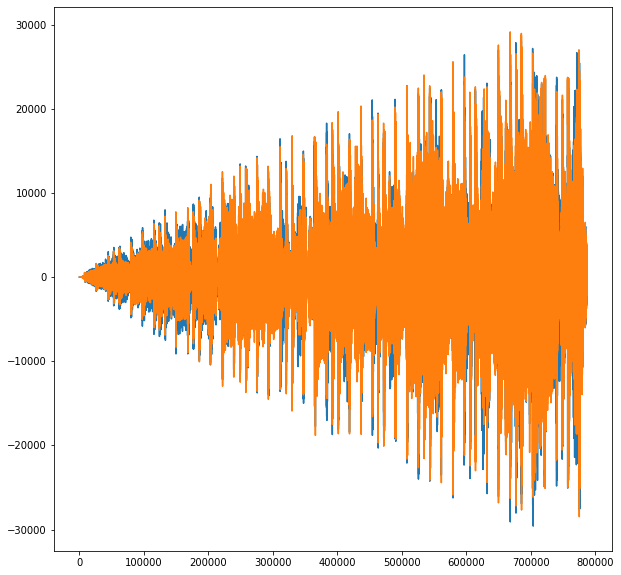

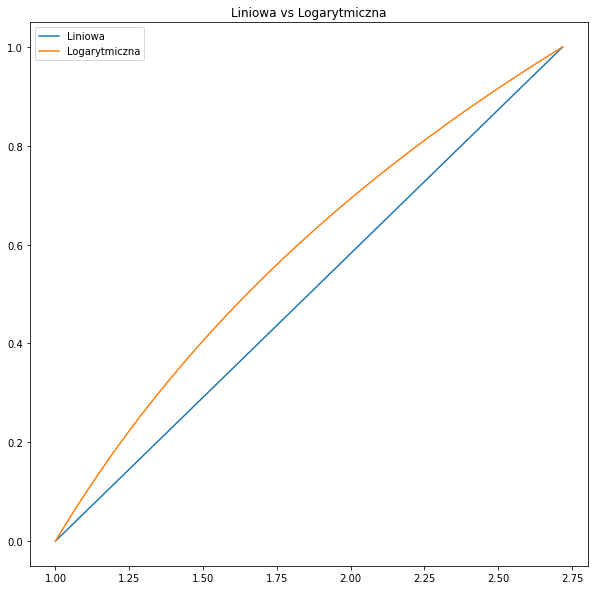

In [318]:
samplerate2, data2 = wavfile.read('leto.wav')
signal1 = data2[0:, 0]
signal2 = data2[0:, 1]

kernel = np.log(np.linspace(1, np.exp(1), len(data2)))

data2[0:, 0] = signal1 * kernel
data2[0:, 1] = signal2 * kernel
plt.plot(data2)
plt.show()
wavfile.write("test4.wav", samplerate, data2)

# Róznica polega na tym, że fade in logarytmiczny będzie osiągać wyższe wartości szybiciej.
# Wynika to z różnic 2 przebiegu funkcji f(x)=log(x) w przedziale (1, e) oraz dunkcji f(x) = x w przedziale (0, 1).
plt.plot(np.linspace(1, np.exp(1)), np.linspace(0, 1), label="Liniowa") 
plt.plot(np.linspace(1, np.exp(1)), np.log(np.linspace(1, np.exp(1))), label="Logarytmiczna")
plt.legend()
plt.title("Liniowa vs Logarytmiczna")
plt.show()

7. Odejmij od siebie wartości próbek w obu kanałach, podziel wynik przez dwa i zapisz do pliku .wav. Pamiętaj żeby przed zapisem do pliku przekonwertować wynik tej operacji na <b>int</b> korzystając z <b>astype('int16')</b>. Co się stało z nagraniem? Jaka jest tego przyczyna?

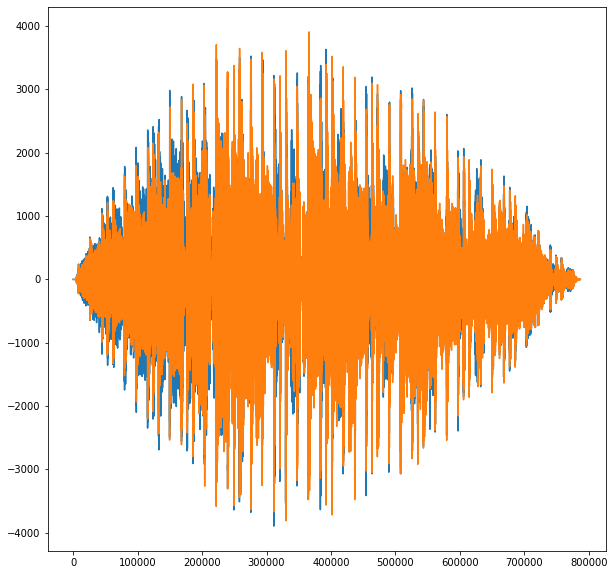

In [321]:
data3 = data1 - data2
plt.plot(data3)
wavfile.write("test5.wav", samplerate, data3.astype('int16'))
# Nastąpiło dodanie efektu fade out oraz ogólne przyciszenie dźwięku.
# Przyczyną tego są różnice w przebiegu funkcji (jak wyżej na wykresie).